## Preliminary data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("data/mlbootcamp5_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Let's convert the data into long format and depict the value counts of the categorical features using factorplot().

In [8]:
df_unique = pd.melt(frame=df, value_vars=['gender','cholesterol', 'gluc',
                              'smoke', 'alco', 'active', 'cardio'])
df_unique

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


In [9]:
unique_counts = df_unique.groupby(["variable", "value"])["value"].count()
unique_counts

variable     value
active       0        13739
             1        56261
alco         0        66236
             1         3764
cardio       0        35021
             1        34979
cholesterol  1        52385
             2         9549
             3         8066
gender       1        45530
             2        24470
gluc         1        59479
             2         5190
             3         5331
smoke        0        63831
             1         6169
Name: value, dtype: int64

In [10]:
df_unique_counts = pd.DataFrame(unique_counts).rename(columns={"value": "count"}).reset_index()
df_unique_counts

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


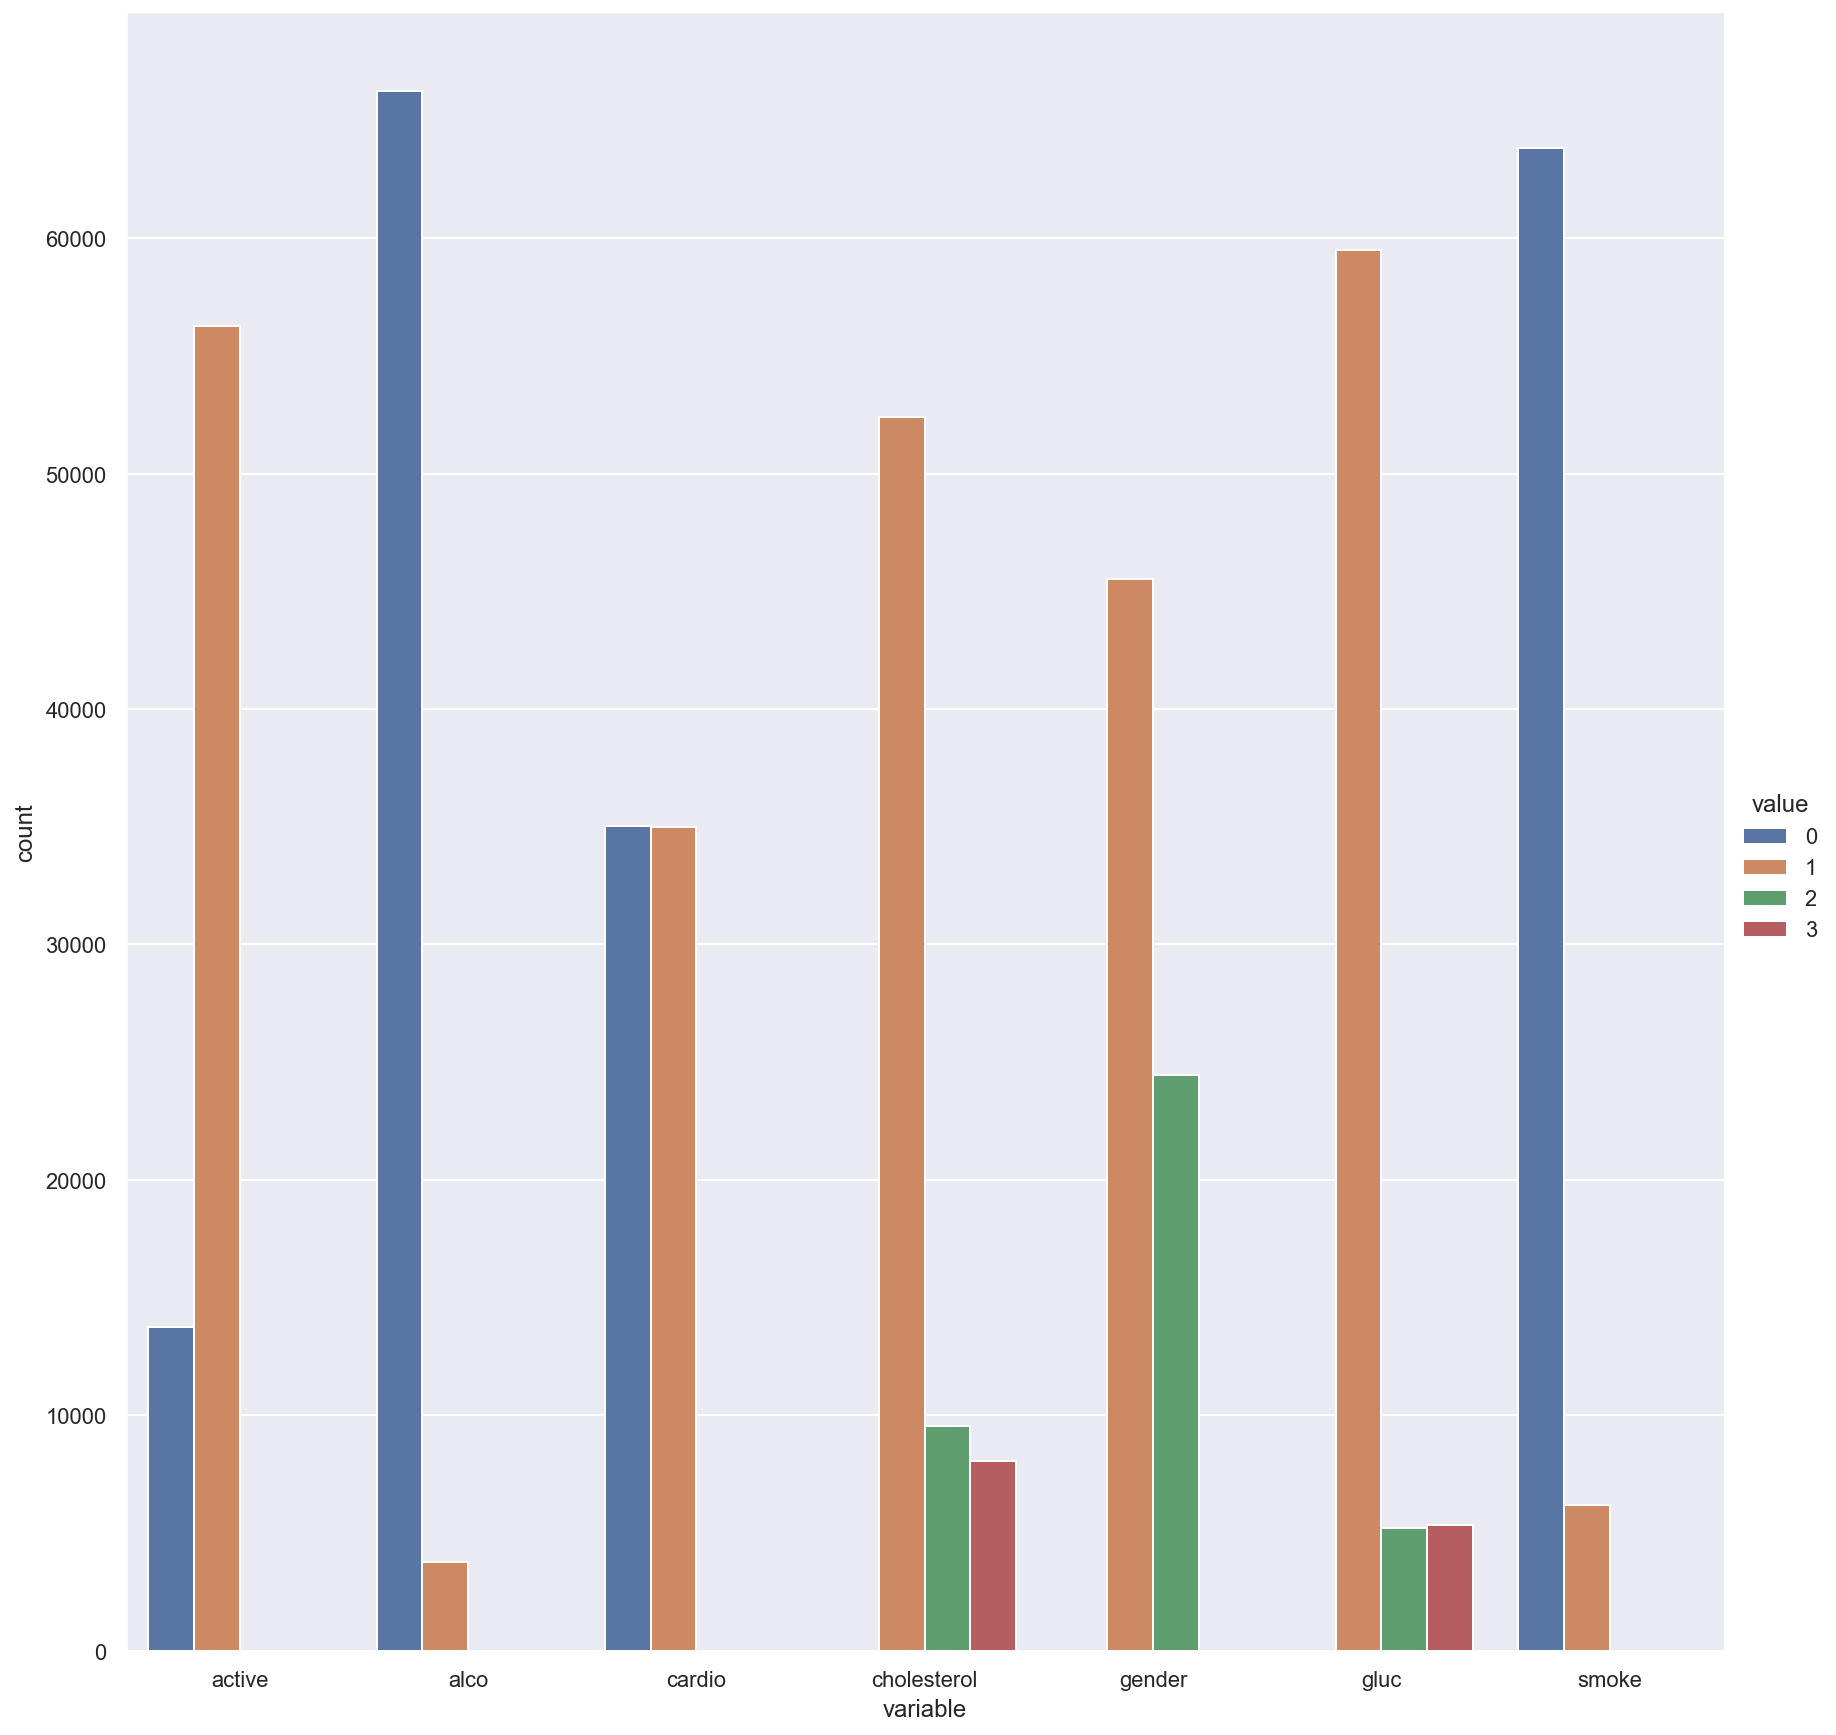

In [11]:
sns.catplot(x="variable", y="count", hue="value", data=df_unique_counts, kind="bar", height=12);

Let's split the dataset by target values. Can you already spot the most significant feature by just looking at the plot?

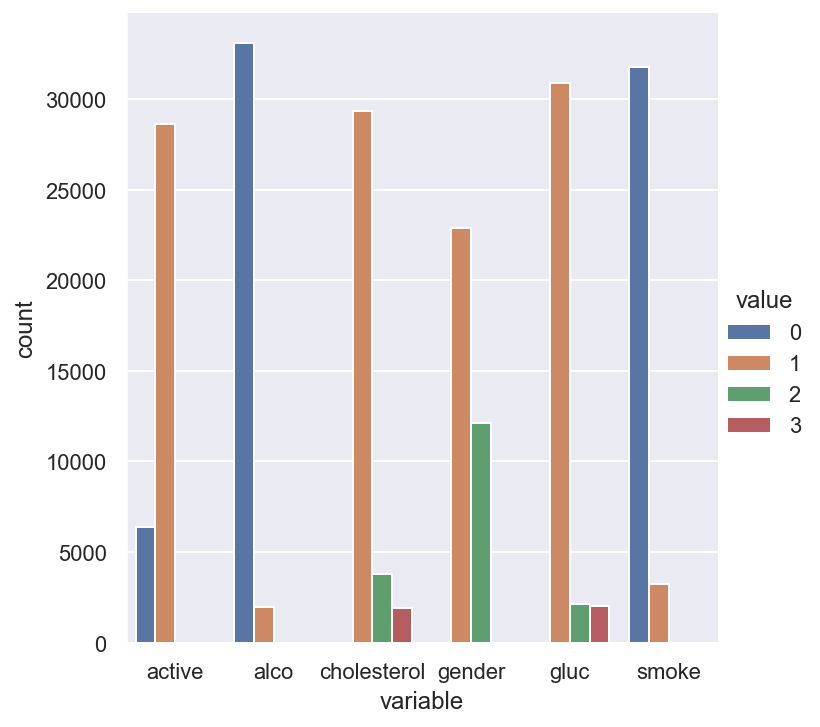

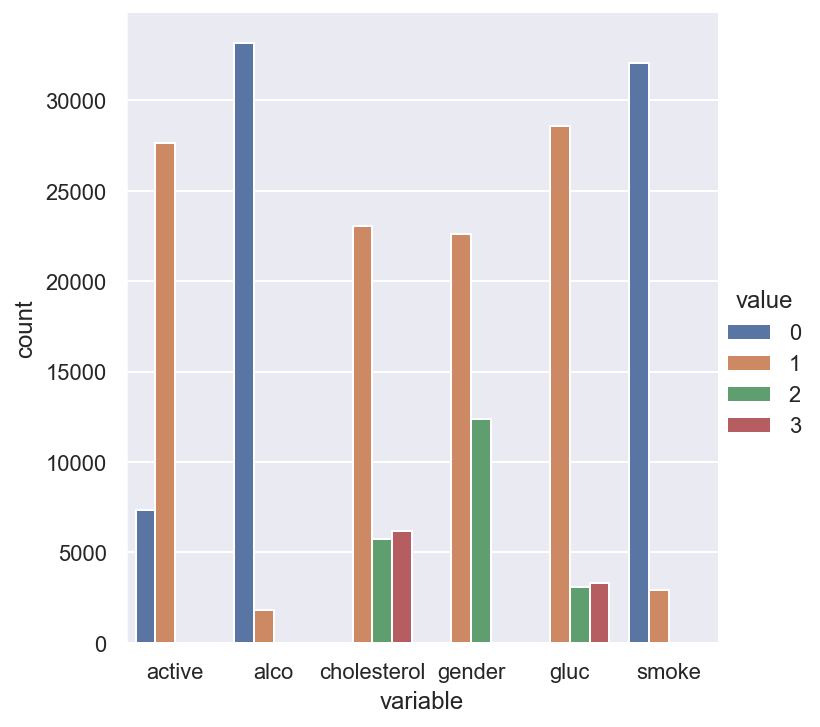

In [12]:
df_0_melt = pd.melt(frame=df[df["cardio"] == 0], value_vars=['gender','cholesterol', 'gluc',
                                                               'smoke', 'alco', 'active'])

df_0_melt = df_0_melt.groupby(["variable", "value"])["value"].count()
df_0 = pd.DataFrame(df_0_melt).rename(columns={"value": "count"}).reset_index()

df_1_melt = pd.melt(frame=df[df["cardio"] == 1], value_vars=['gender','cholesterol', 'gluc',
                                                               'smoke', 'alco', 'active'])

df_1_melt = df_1_melt.groupby(["variable", "value"])["value"].count()
df_1 = pd.DataFrame(df_1_melt).rename(columns={"value": "count"}).reset_index()

sns.catplot(x="variable", y="count", hue="value", kind="bar", data=df_0)
sns.catplot(x="variable", y="count", hue="value", kind="bar", data=df_1)

### Basic observations

#### How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

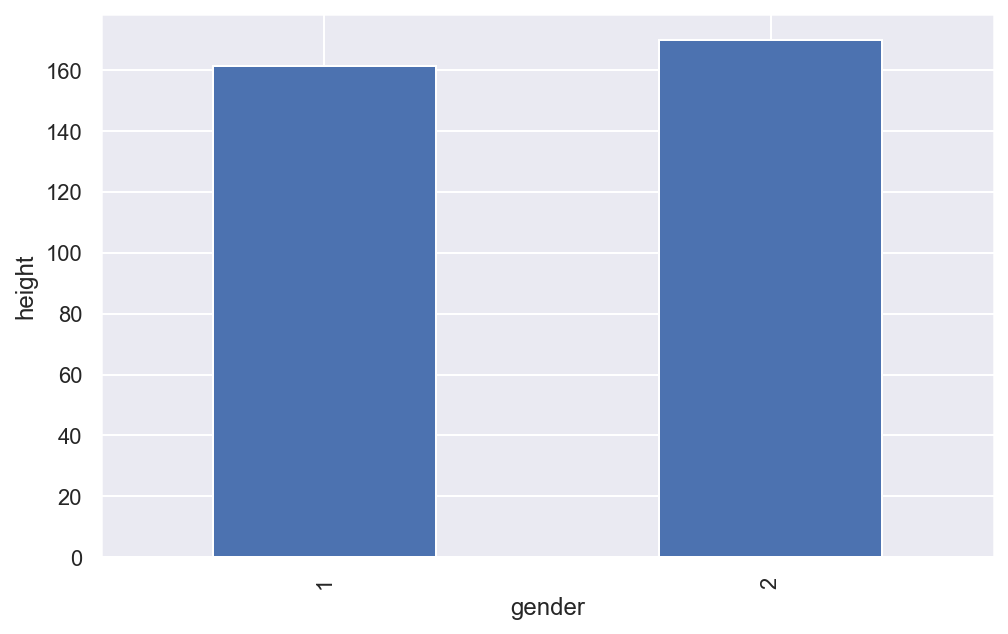

In [13]:
gh = df.groupby(["gender"])["height"].mean()
gh = pd.DataFrame(data=gh)
gh.plot(kind="bar", legend=False, ylabel="height", figsize=(8, 5));

"2" are taller than "1"

In [14]:
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

A: 45530 women (1) and 24470 men (2)

#### Which gender more often reports consuming alcohol - men or women?

In [15]:
df.groupby(["gender"])["alco"].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

In [16]:
df.loc[df["alco"] == 1, "gender"].value_counts()

2    2603
1    1161
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

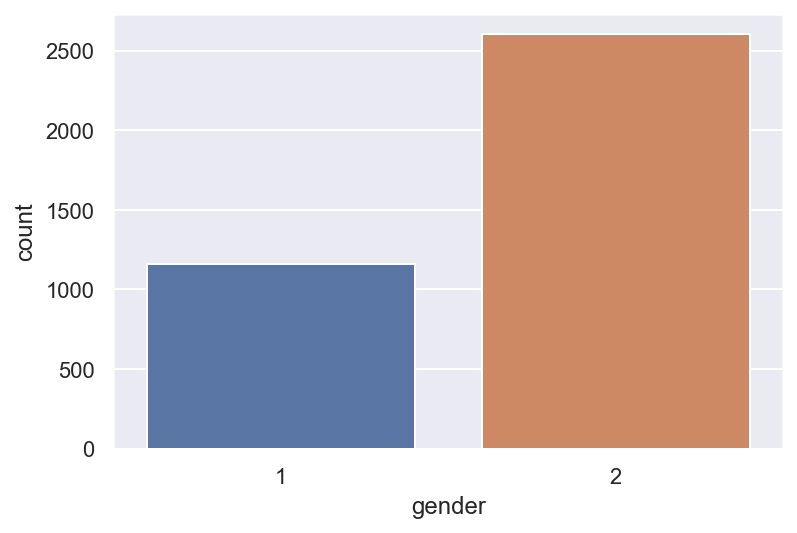

In [17]:
sns.countplot(x="gender", data=df[df["alco"] == 1])

A: Men

#### What is the difference between the percentages of smokers among men and women (rounded)?

<AxesSubplot:xlabel='gender', ylabel='count'>

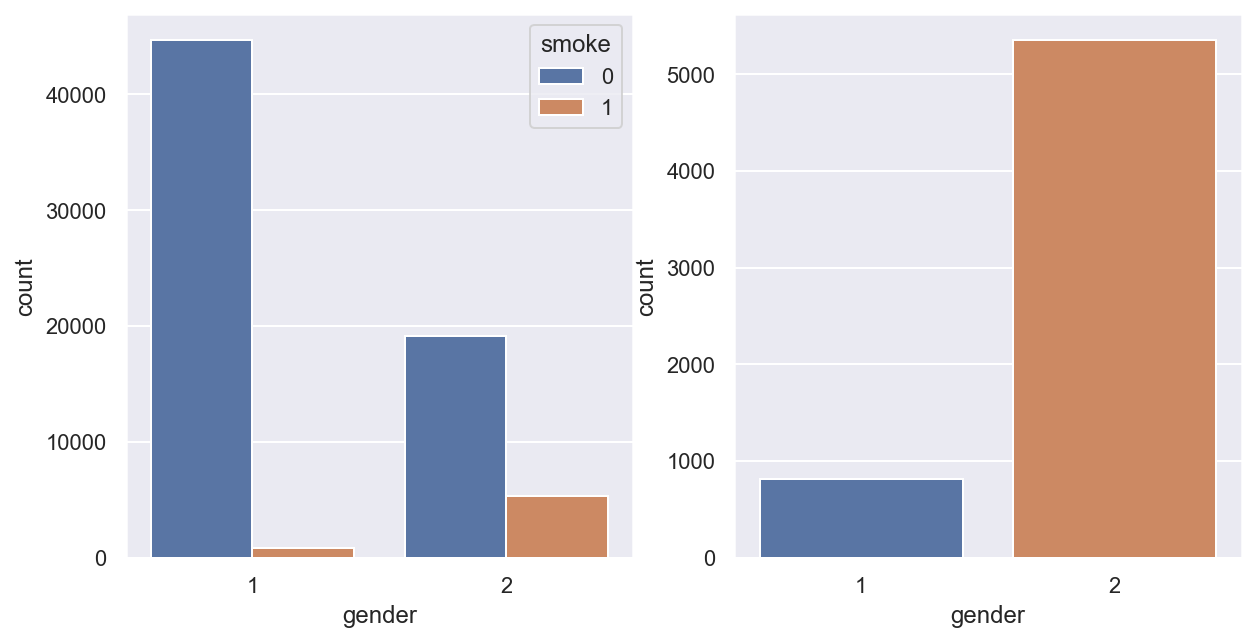

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x="gender", data=df, hue="smoke", ax=axes[0])
sns.countplot(x="gender", data=df[df["smoke"] == 1], ax=axes[1])

In [19]:
df[df["smoke"] == 1]["gender"].value_counts()

2    5356
1     813
Name: gender, dtype: int64

I'm sorry, I don't know how to find out the correct answer...

In [20]:
# The answer is:
df.groupby("gender")["smoke"].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

The answer is 0.20 or 20%

#### What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

In [21]:
median_age_smoke = df.groupby(["smoke"])["age"].median() / 30
np.abs(np.diff(median_age_smoke))

array([19.9])

A: Rounded to 20

<AxesSubplot:xlabel='smoke', ylabel='age'>

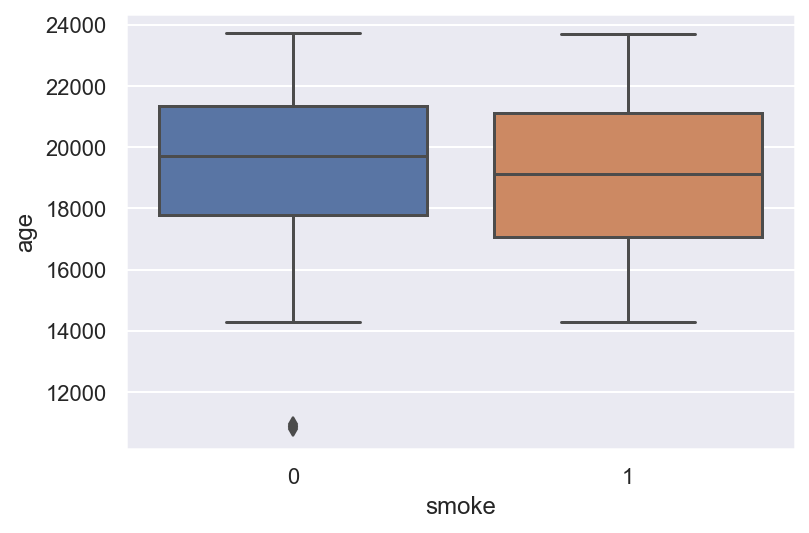

In [22]:
sns.boxplot(x="smoke", y="age", data=df)

## Risk maps

Calculate age_years feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.

In [23]:
df["age_years"] = (df["age"] / (30 * 12)).astype(int)
df_ages = df[(df["age_years"] >= 60) & (df["age_years"] <= 64)]
df_ages["cardio"].value_counts() / len(df_ages)

1    0.652415
0    0.347585
Name: cardio, dtype: float64

0.65 is almost the double of 0.34

<AxesSubplot:xlabel='age_years', ylabel='count'>

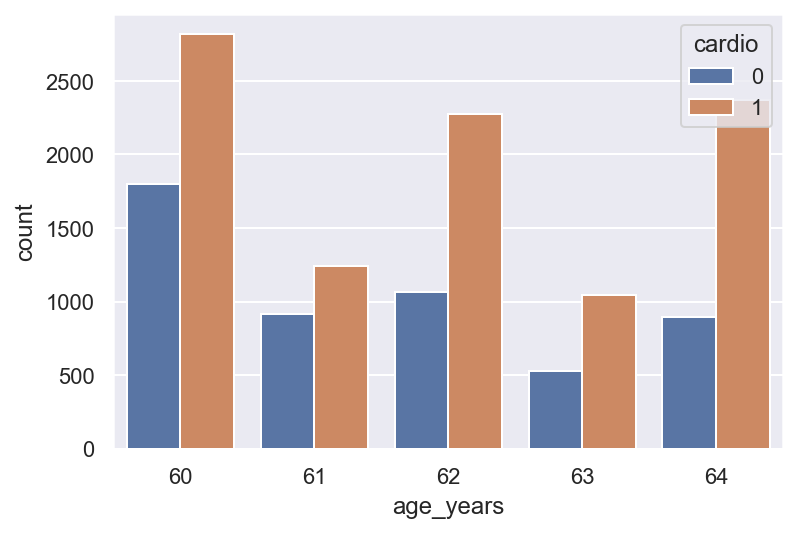

In [24]:
sns.countplot(x="age_years", hue="cardio", data=df_ages)

<AxesSubplot:xlabel='cardio', ylabel='count'>

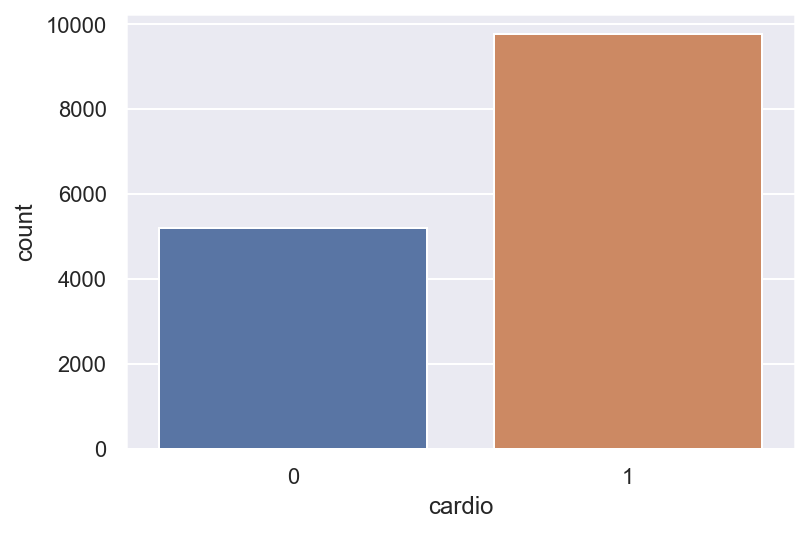

In [25]:
sns.countplot(x=df_ages["cardio"], data=df_ages)

I saw the solution until here.... there is no plot.... f****** b****** peepoLeave >:'v (is an emote)

## Analyzing BMI

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [98]:
df["bmi"] = df["weight"] / (df["height"] / 100)**2
# Median BMI
print(f"Median: {df['bmi'].median()}") # we cannot use "" inside a f"{}" format, we should use '' instead
print("")
# BMI average for women and men
print("BMI Average")
print("Women:", df.groupby("gender")["bmi"].mean().loc[1])
print("Men:", df.groupby("gender")["bmi"].mean().loc[2])
print("")
# Healty people BMI vs CVD BMI
print(df.groupby(['cardio'])['bmi'].mean())
print("")
# For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women
hnd = df[(df['cardio'] == 0) & (df['alco'] == 0)] # hnd = Healty Non-Drinking but in lowercase xd
hnd.groupby(['gender'])['bmi'].mean()

Median: 26.374068120774975

BMI Average
Women: 27.98758344183285
Men: 26.754442357289356

cardio
0    26.548175
1    28.566061
Name: bmi, dtype: float64



gender
1    26.845407
2    25.872638
Name: bmi, dtype: float64

Correct statements are:
* The BMI for women is on average higher than for men.
* For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

## Cleaning data

In [144]:
# Make a copy of the original dataset
df_filtered = df.copy()
# diastolic pressure (ap_lo) is higher than systolic (ap_hi)
filter_1 = df[df['ap_lo'] > df['ap_hi']]
# height is strictly less than 2.5 percentile
filter_2 = df[df['height'] < df['height'].quantile(0.025)]
# height is strictly more than 97.5 percentile
filter_3 = df[df['height'] > df['height'].quantile(0.975)]
# weight is strictly less than 2.5 percentile
filter_4 = df[df['weight'] < df['weight'].quantile(0.025)]
# weight is strictly more than 97.5 percentile
filter_5 = df[df['weight'] > df['weight'].quantile(0.975)]
# concat all index filters
filters = np.concatenate((filter_1.index.to_numpy(),
                          filter_2.index.to_numpy(),
                          filter_3.index.to_numpy(),
                          filter_4.index.to_numpy(),
                          filter_5.index.to_numpy()), axis=None)
# drop rows by index filters
df_filtered.drop(filters, axis=0)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,62,27.099251


#### What percent of the original data (rounded) did we throw away?

In [155]:
round((filters.shape[0] / df.shape[0]) * 100)

10

A: 10

## Visual data analysis

<AxesSubplot:>

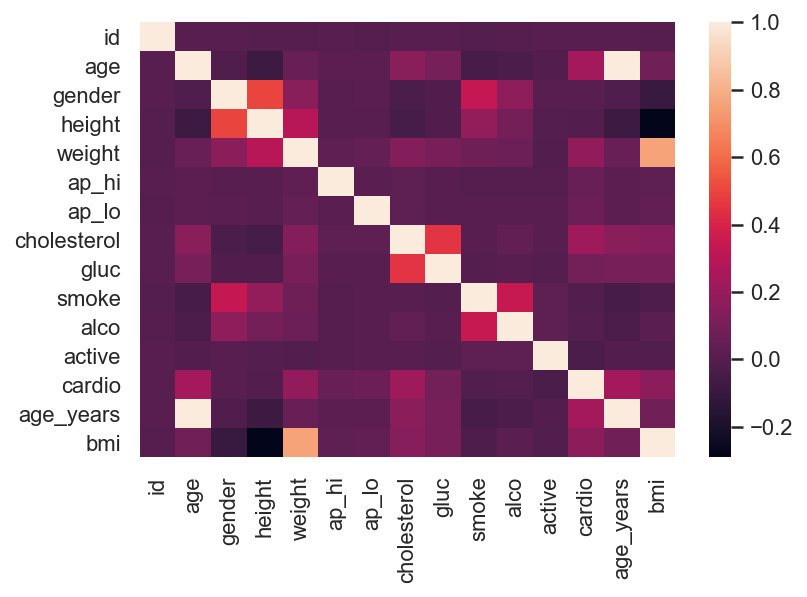

In [183]:
df_num = df.select_dtypes(include='number')
corr_m = df_num.corr(method='pearson')
sns.heatmap(corr_m)

#### Which pair of features has the strongest Pearson's correlation with the gender feature? 

A: Height and smoke

<AxesSubplot:xlabel='variable', ylabel='value'>

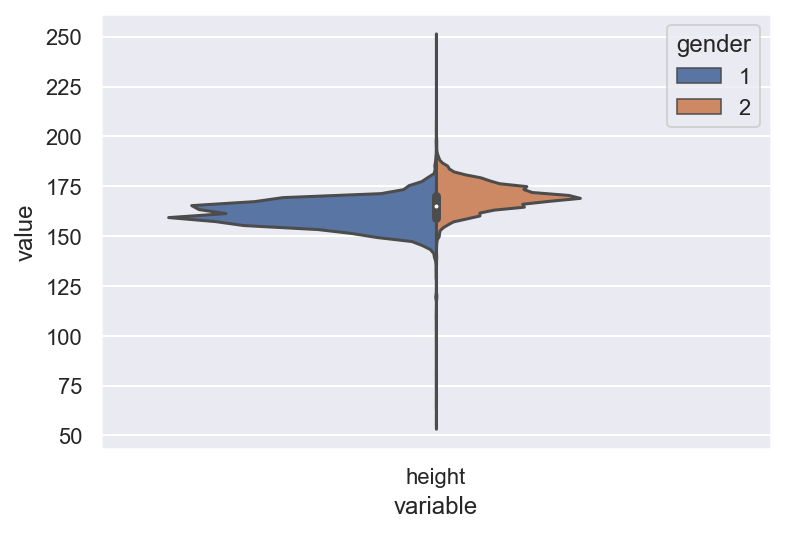

In [181]:
df_melted = pd.melt(df, value_vars=['height'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=df_melted, scale='count', split=True)

#### Which pair of features has the strongest Spearman correlation?

<AxesSubplot:>

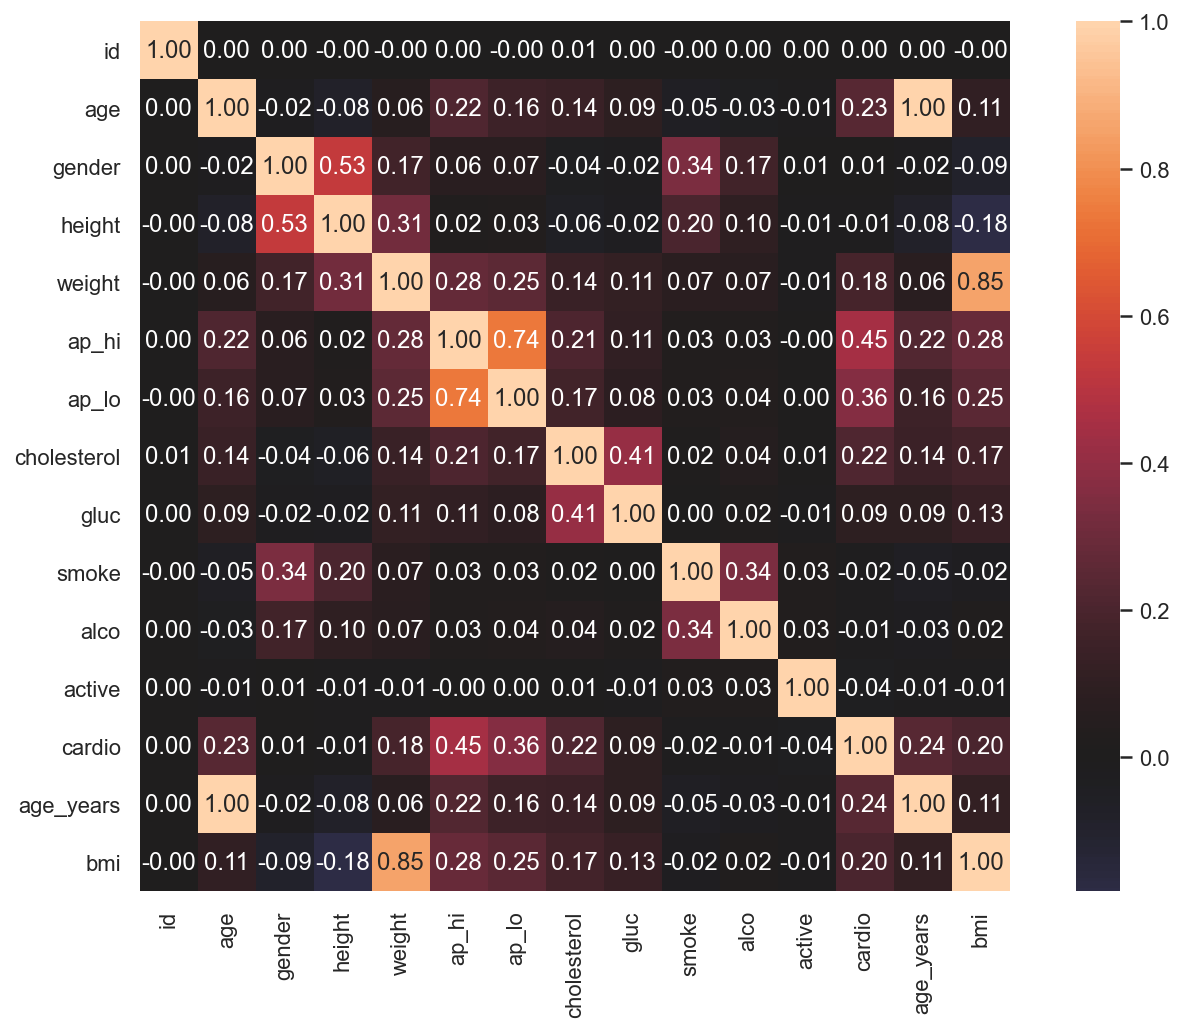

In [204]:
corr_sp = df_num.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 10)) # figsize=(12, 8) also works fine (it doesn't see with blur)
sns.heatmap(corr_sp, center=0, annot=True, fmt='0.2f', square=True, ax=ax)

A: ap_lo and ap_li.

Why not Weight and bmi? Because bmi isn't in the initial dataframe

#### Why do these features have strong rank correlation?

A: Nature of the data.

<AxesSubplot:xlabel='age_years', ylabel='count'>

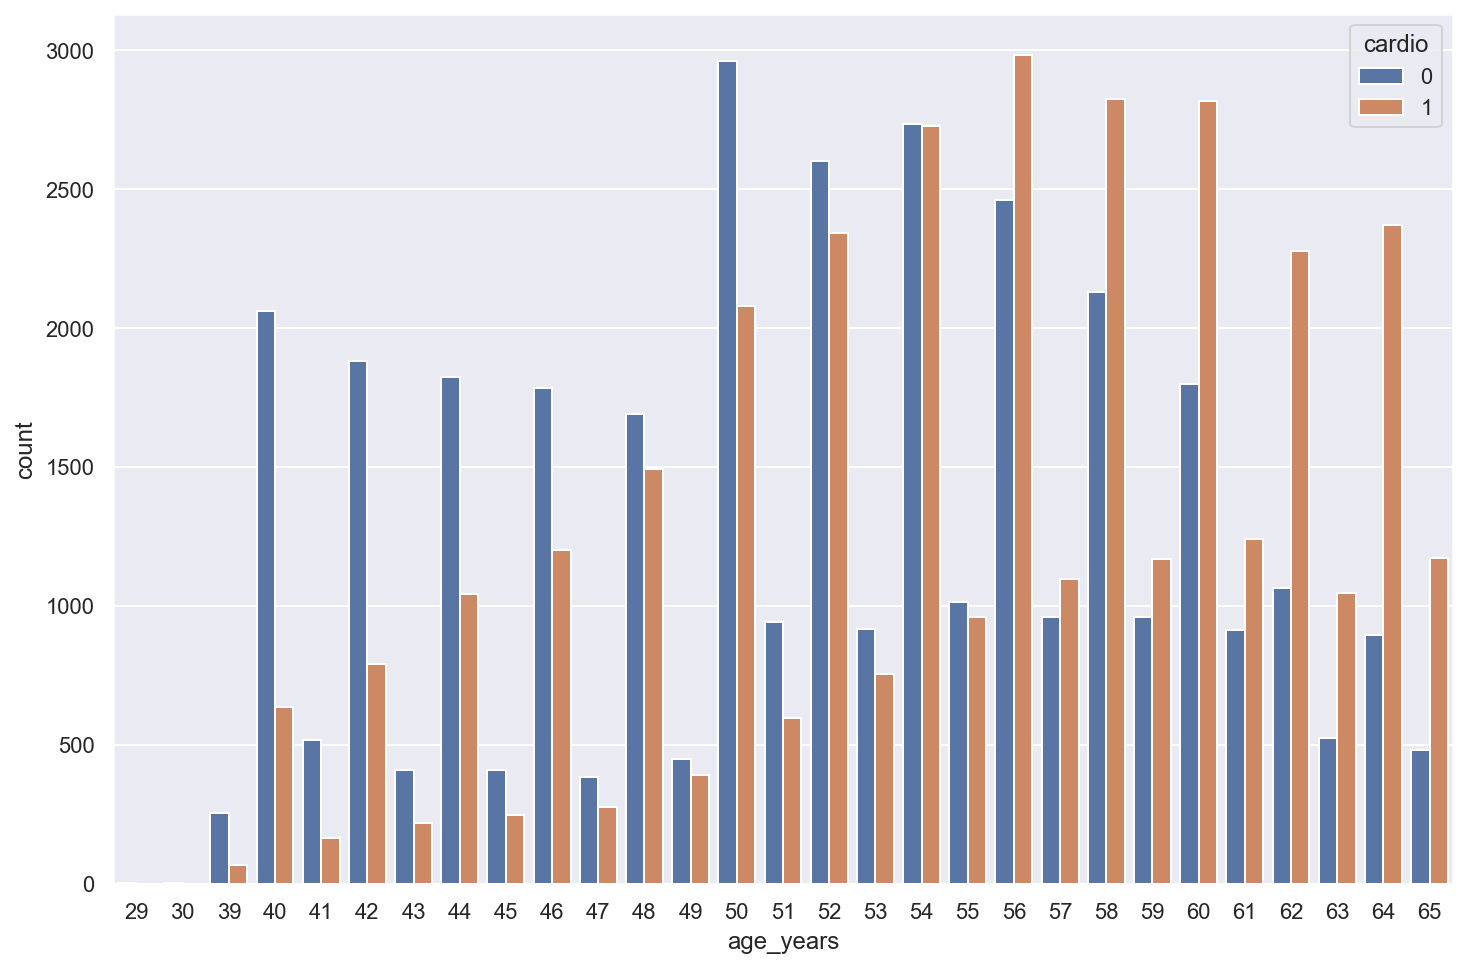

In [205]:
fig, ax = plt.subplots(figsize=(12, 8)) # figsize=(12, 8) seems a nice ratio to sns
sns.countplot(x='age_years', hue='cardio', data=df)

#### What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

A: 56

**Note**: The answer is 55, this is because he (creator of the course) use the following formula to calculate `age_years`:

* `df['age_years'] = (df['age'] / 365.25).round().astype('int')`
   
And I used: 
* `df["age_years"] = (df["age"] / (30 * 12)).astype(int)`